# scipy.optimize.curve_fit

https://towardsdatascience.com/basic-curve-fitting-of-scientific-data-with-python-9592244a2509

## Init

In [9]:
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pylab import cm
%matplotlib inline 
import mpld3
#mpld3.enable_notebook()

In [10]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('figure', figsize=(13, 8))  
plt.rc('lines', linewidth=2)  

## Exponential Fitting

y = a * e^bx

In [11]:
def exponential(x, a, b):
    return a*np.exp(b*x)

Prepare x

In [12]:
x_dummy = np.linspace(start=5, stop=15, num=50)

Make y

In [13]:
y_dummy = exponential(x_dummy, 0.5, 0.5)

Add noise

In [14]:
noise = 5*np.random.normal(size=y_dummy.size)
y_dummy = y_dummy + noise

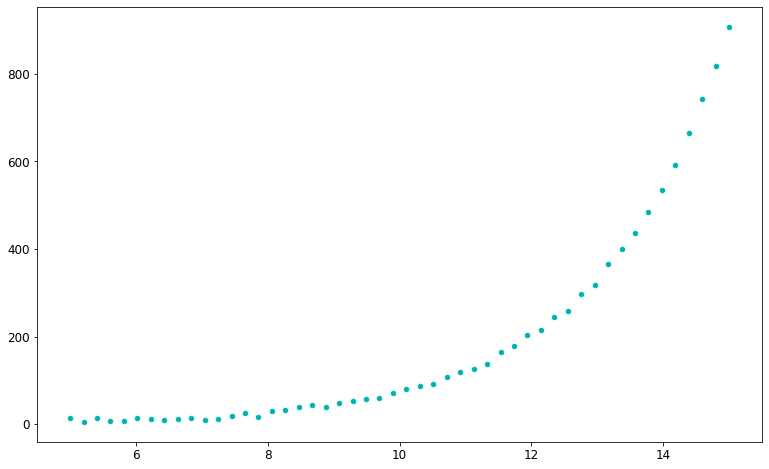

In [15]:
fig, ax = plt.subplots(1, 1)
ax.scatter(x_dummy, y_dummy, s=20, color='#00b3b3', label='Data')

plt.show()

Trying log scale

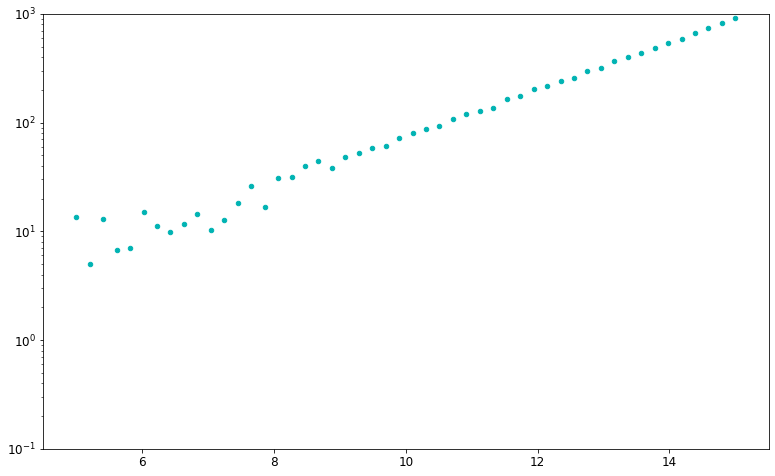

In [16]:
# Set the y-axis scaling to logarithmic
ax.set_yscale('log')
# Set the y-ticks
ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10.0))
# Set the y-axis limits
ax.set_ylim(0.1, 1000)
fig

### mpld3

mpld3 displays log scaled plot weirdly. It's like it's not even the same plot. It's mirrored at x axis

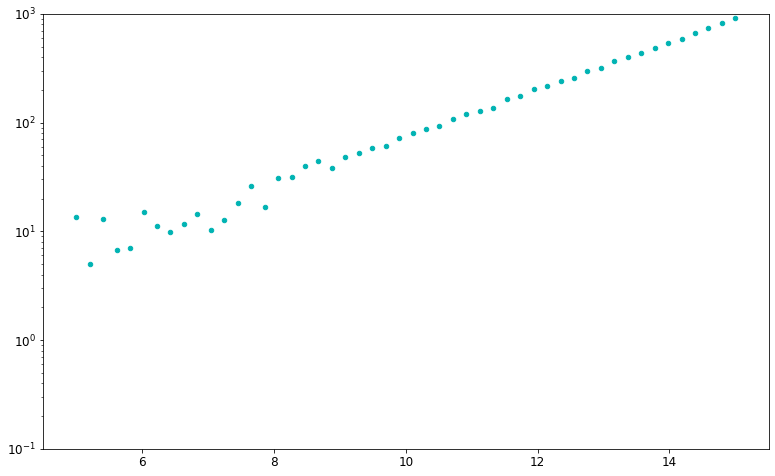

In [18]:
mpld3.enable_notebook()
fig

There's a workaround to use plot instead of scatter.

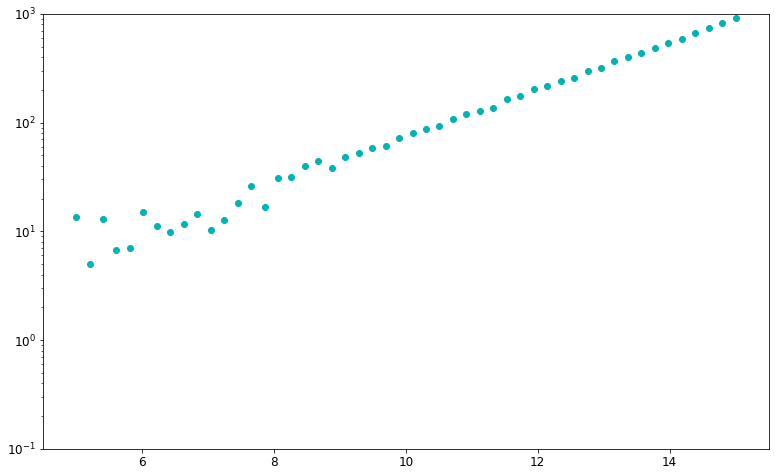

In [22]:
mpld3.enable_notebook()
fig, ax = plt.subplots(1, 1)
ax.plot(x_dummy, y_dummy, marker='o', linestyle='', color='#00b3b3', label='Data')
# Set the y-axis scaling to logarithmic
ax.set_yscale('log')
# Set the y-ticks
ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10.0))
# Set the y-axis limits
ax.set_ylim(0.1, 1000)
plt.show()

### Back to Exponential Fitting

Now we fit the data. Most inputs are self explanatory, except for few inpnuts. p0 is the initial guess of the parameters. bounds are the bounds for the parameters.

This produces two outputs, which we store in pars and cov. Pars contains the best fitting value of the parameters. Cov contains the covariance to calculate stdev.

In [23]:
pars, cov = curve_fit(f=exponential, xdata=x_dummy, ydata=y_dummy, p0=[0, 0], bounds=(-np.inf, np.inf))

In [24]:
pars

array([0.48875575, 0.50152805])

Not far off eh? Couldnt be so close due to the random noises.

Here's the guessed parameters doing.

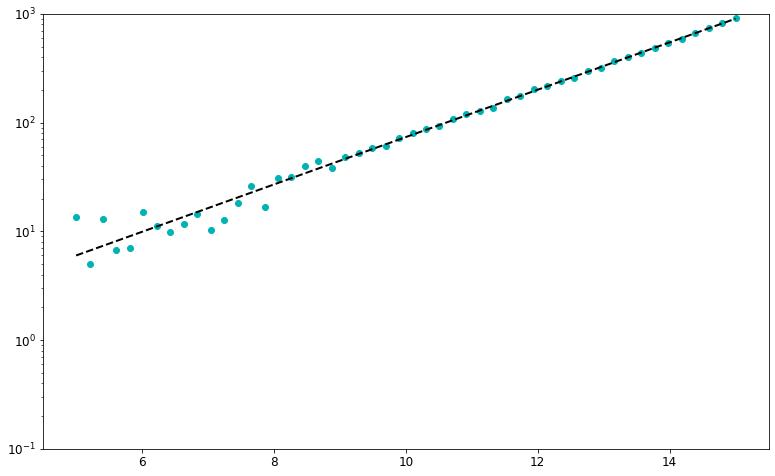

In [28]:

fig, ax = plt.subplots(1, 1)
ax.plot(x_dummy, y_dummy, marker='o', linestyle='', color='#00b3b3', label='Data')
ax.plot(x_dummy, exponential(x_dummy, *pars), linestyle='--', linewidth=2, color='black')
# Set the y-axis scaling to logarithmic
ax.set_yscale('log')
# Set the y-ticks
ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10.0))
# Set the y-axis limits
ax.set_ylim(0.1, 1000)
plt.show()

### Standard Deviations

Cov contains the covariance to calculate stdev. With that, we can calculate the stdev.

In [25]:
cov

array([[ 2.27369765e-04, -3.28254828e-05],
       [-3.28254828e-05,  4.76254456e-06]])

In [30]:
# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
stdevs = np.sqrt(np.diag(cov))
stdevs

array([0.01507879, 0.00218233])

### Residues

It's the difference of the guessed function and the data.

In [26]:
# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
stdevs = np.sqrt(np.diag(cov))
# Calculate the residuals
res = y_dummy - exponential(x_dummy, *pars)

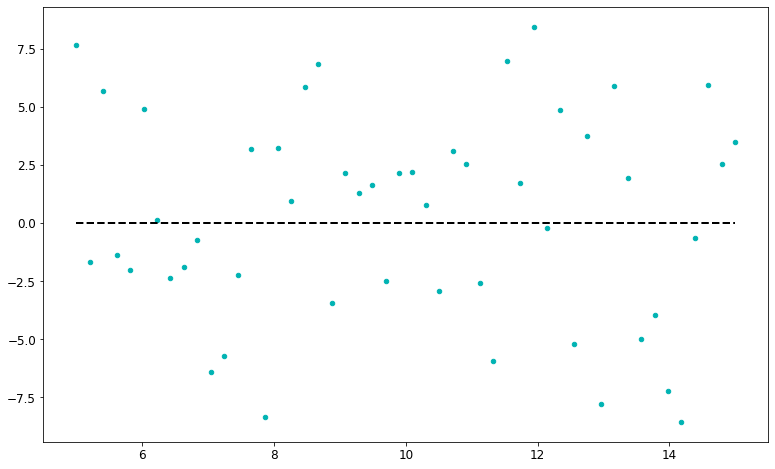

In [33]:

fig, ax = plt.subplots(1, 1)
#ax.plot(x_dummy, res, marker='o', linestyle='', color='#00b3b3', label='Data')
ax.scatter(x_dummy, res, s=20, color='#00b3b3', label='Data')
ax.plot(x_dummy, np.zeros(len(x_dummy)), linestyle='--', linewidth=2, color='black')

plt.show()

## Power-Law Fitting

y = ax^b

In [34]:
# Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)

In [35]:
# Generate dummy dataset
x_dummy = np.linspace(start=1, stop=1000, num=100)
y_dummy = power_law(x_dummy, 1, 0.5)
# Add noise from a Gaussian distribution
noise = 1.5*np.random.normal(size=y_dummy.size)
y_dummy = y_dummy + noise

For this one, we scale both x and y axis to log.

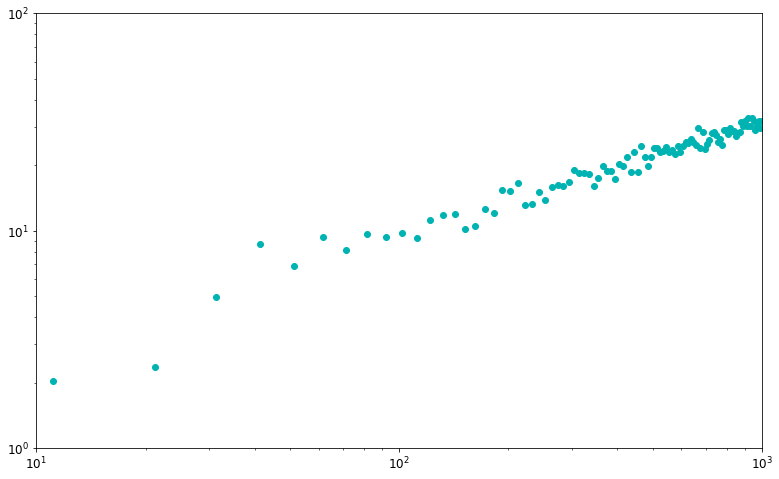

In [38]:
fig, ax = plt.subplots(1, 1)
ax.plot(x_dummy, y_dummy, marker='o', linestyle='', color='#00b3b3', label='Data')
# Set the x and y-axis scaling to logarithmic
ax.set_xscale('log')
ax.set_yscale('log')
# Edit the major and minor tick locations of x and y axes
ax.xaxis.set_major_locator(mpl.ticker.LogLocator(base=10.0))
ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10.0))
# Set the axis limits
ax.set_xlim(10, 1000)
ax.set_ylim(1, 100)
plt.show()

### Fitting

Fitting steps are the same

In [39]:
# Fit the dummy power-law data
pars, cov = curve_fit(f=power_law, xdata=x_dummy, ydata=y_dummy, p0=[0, 0], bounds=(-np.inf, np.inf))
pars

array([0.88045953, 0.51930533])

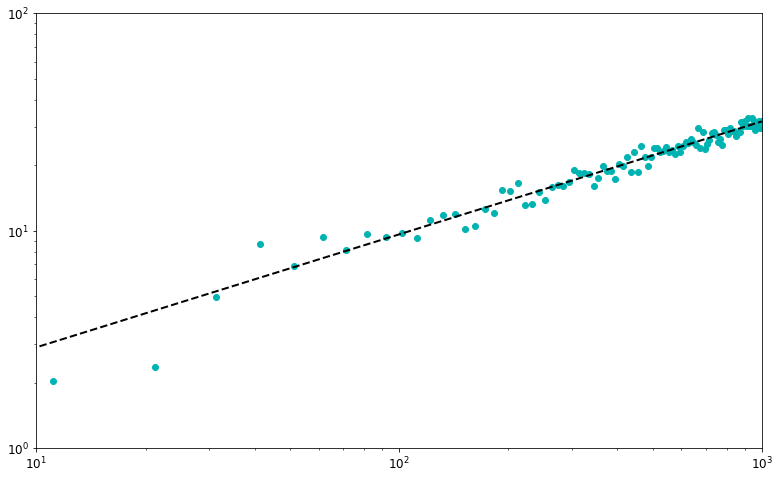

In [42]:
fig, ax = plt.subplots(1, 1)
ax.plot(x_dummy, y_dummy, marker='o', linestyle='', color='#00b3b3', label='Data')
ax.plot(x_dummy, power_law(x_dummy, *pars), linestyle='--', linewidth=2, color='black')
# Set the x and y-axis scaling to logarithmic
ax.set_xscale('log')
ax.set_yscale('log')
# Edit the major and minor tick locations of x and y axes
ax.xaxis.set_major_locator(mpl.ticker.LogLocator(base=10.0))
ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10.0))
# Set the axis limits
ax.set_xlim(10, 1000)
ax.set_ylim(1, 100)
plt.show()

### Standard Deviation

In [40]:
# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
stdevs = np.sqrt(np.diag(cov))
stdevs

array([0.07381429, 0.01301606])

### Residues

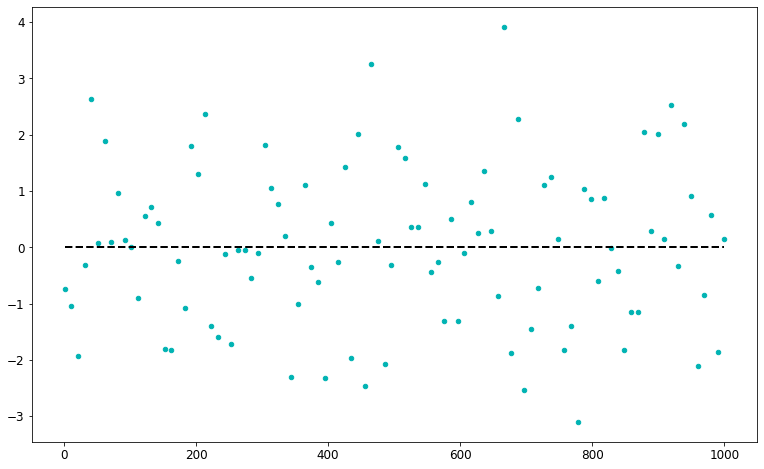

In [43]:
# Calculate the residuals
res = y_dummy - power_law(x_dummy, *pars)

fig, ax = plt.subplots(1, 1)
#ax.plot(x_dummy, res, marker='o', linestyle='', color='#00b3b3', label='Data')
ax.scatter(x_dummy, res, s=20, color='#00b3b3', label='Data')
ax.plot(x_dummy, np.zeros(len(x_dummy)), linestyle='--', linewidth=2, color='black')

plt.show()

## Gaussian Peak Fitting

y = a * e^(-((x-b)^2)/2(c^2))

In [60]:
# Function to calculate the Gaussian with constants a, b, and c
def gaussian(x, a, b, c):
    return a*np.exp(-np.power(x - b, 2)/(2*np.power(c, 2)))

In [61]:
# Generate dummy dataset
x_dummy = np.linspace(start=-10, stop=10, num=100)
y_dummy = gaussian(x_dummy, 8, -1, 3)
# Add noise from a Gaussian distribution
noise = 0.5*np.random.normal(size=y_dummy.size)
y_dummy = y_dummy + noise

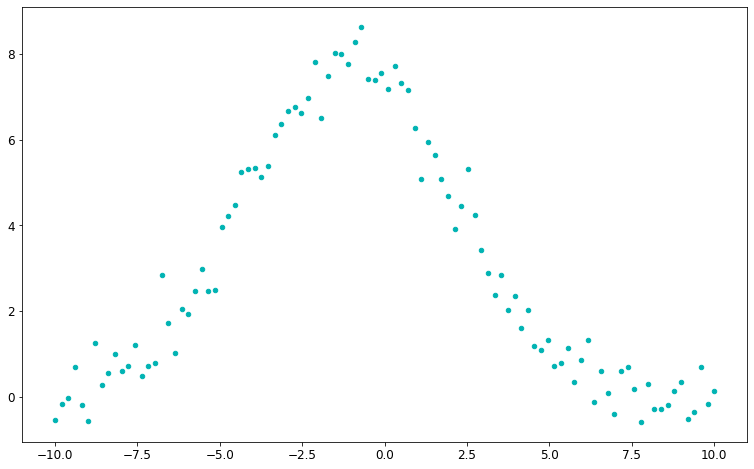

In [62]:

fig, ax = plt.subplots(1, 1)
#ax.plot(x_dummy, res, marker='o', linestyle='', color='#00b3b3', label='Data')
ax.scatter(x_dummy, y_dummy, s=20, color='#00b3b3', label='Data')

plt.show()

### Fitting

In [63]:
# Fit the dummy Gaussian data
pars, cov = curve_fit(f=gaussian, xdata=x_dummy, ydata=y_dummy, p0=[0, 0, 0], bounds=(-np.inf, np.inf))
pars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


array([0., 0., 0.])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


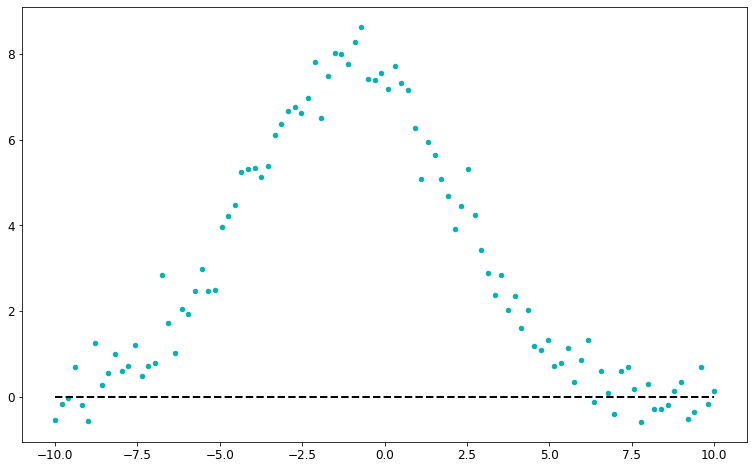

In [64]:

fig, ax = plt.subplots(1, 1)
#ax.plot(x_dummy, res, marker='o', linestyle='', color='#00b3b3', label='Data')
ax.scatter(x_dummy, y_dummy, s=20, color='#00b3b3', label='Data')
ax.plot(x_dummy, gaussian(x_dummy, *pars), linestyle='--', linewidth=2, color='black')

plt.show()

### Standard Deviation

In [65]:
# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
stdevs = np.sqrt(np.diag(cov))
stdevs

array([inf, inf, inf])

### Fitting 2

Obviously they were wrongly guessed parameters. There was even an error. This is because our initial parameter guesses were really, really bad. So, let's redo it.

In [66]:
# Fit the dummy Gaussian data
pars, cov = curve_fit(f=gaussian, xdata=x_dummy, ydata=y_dummy, p0=[5, -1, 1], bounds=(-np.inf, np.inf))
pars

array([ 7.89593805, -1.06540411,  3.07933299])

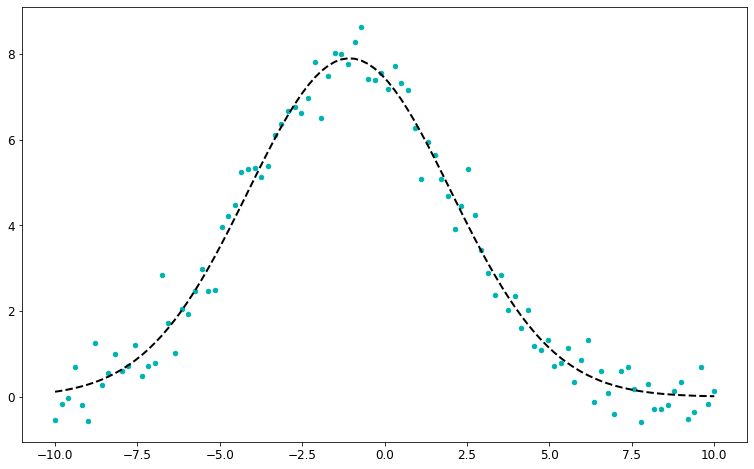

In [69]:

fig, ax = plt.subplots(1, 1)
#ax.plot(x_dummy, res, marker='o', linestyle='', color='#00b3b3', label='Data')
ax.scatter(x_dummy, y_dummy, s=20, color='#00b3b3', label='Data')
ax.plot(x_dummy, gaussian(x_dummy, *pars), linestyle='--', linewidth=2, color='black')

plt.show()

### Standard Deviations 2

In [67]:
# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
stdevs = np.sqrt(np.diag(cov))
stdevs

array([0.10981894, 0.04944449, 0.04950615])

### Residues 2?

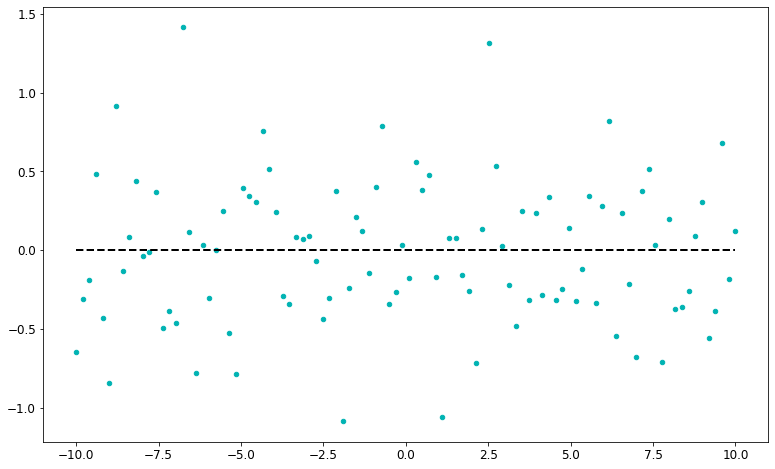

In [73]:
# Calculate the residuals
res = y_dummy - gaussian(x_dummy, *pars)

fig, ax = plt.subplots(1, 1)
#ax.plot(x_dummy, res, marker='o', linestyle='', color='#00b3b3', label='Data')
ax.scatter(x_dummy, res, s=20, color='#00b3b3', label='Data')
ax.plot(x_dummy, np.zeros(len(x_dummy)), linestyle='--', linewidth=2, color='black')

plt.show()